In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D

# Importing data from Yahoo Finance

In [2]:
ADA_2_data = yf.download("ADA-USD", start="2020-12-01", end="2022-11-30")

[*********************100%***********************]  1 of 1 completed


In [3]:
ADA_2_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-01,0.171367,0.173851,0.146573,0.155983,0.155983,2071556994
2020-12-02,0.155956,0.159662,0.151429,0.158557,0.158557,1367595805
2020-12-03,0.158592,0.168009,0.155936,0.164212,0.164212,1287927035
2020-12-04,0.164209,0.164506,0.146964,0.148241,0.148241,1200621758
2020-12-05,0.148164,0.161383,0.146795,0.159668,0.159668,1036100099


In [4]:
ADA_2_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-25,0.316420,0.316827,0.308314,0.314989,0.314989,205372207
2022-11-26,0.314953,0.321897,0.312215,0.313790,0.313790,206097213
2022-11-27,0.313793,0.319191,0.312288,0.312454,0.312454,167898046
2022-11-28,0.312464,0.313785,0.301404,0.306700,0.306700,268746809
2022-11-29,0.306697,0.312370,0.304970,0.309372,0.309372,184241191


In [5]:
data =  ADA_2_data['Adj Close']
data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 729 entries, 2020-12-01 to 2022-11-29
Series name: Adj Close
Non-Null Count  Dtype  
--------------  -----  
729 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


# Data Plot for past 2 Years

Text(0.5, 1.0, 'Cardano Price')

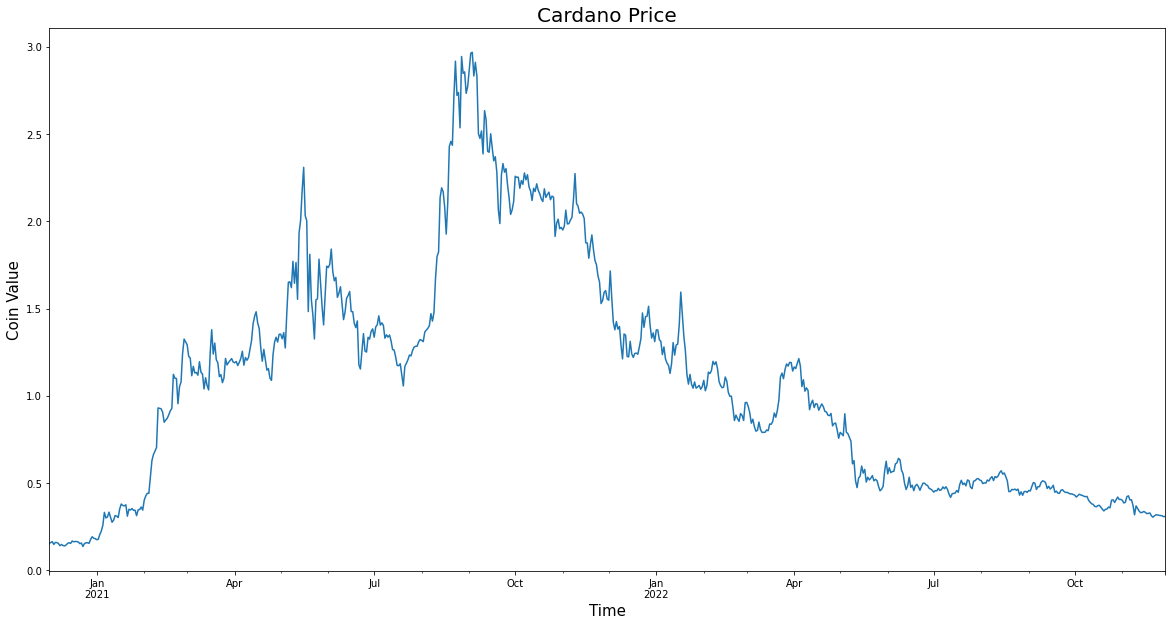

In [6]:
data.plot(figsize=(20, 10))
plt.xlabel('Time', fontsize='15')
plt.ylabel('Coin Value', fontsize='15')
plt.title('Cardano Price', fontsize='20')

# Finding Volatility

In [7]:
ADA_data = yf.download("ADA-USD", start="2021-12-01", end="2022-11-30")

[*********************100%***********************]  1 of 1 completed


In [8]:
ADA_data['Log returns'] = np.log(ADA_data['Close']/ADA_data['Close'].shift(1))

In [9]:
ADA_data['Log returns'].std()

0.05030955738256714

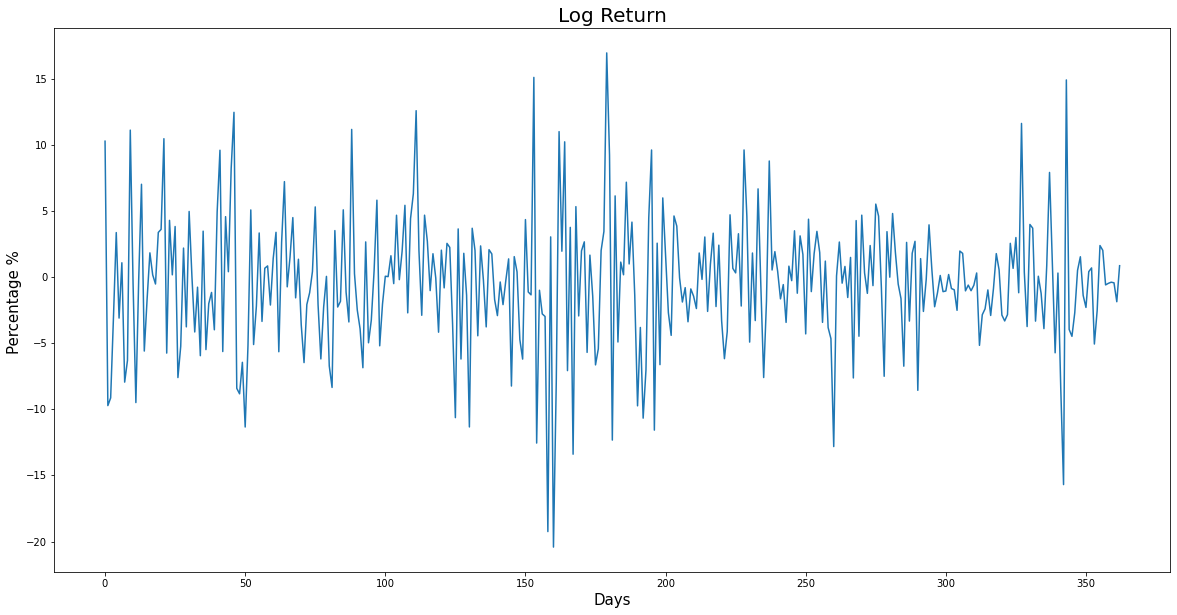

In [10]:
log_return = []
for i in range(0,len(ADA_data)-1):
    adjclose_yesterday = ADA_data.iloc[i]['Adj Close']
    adjclose_today = ADA_data.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]
dflr = pd.DataFrame(log_return, columns = ['log']) 
fig = plt.figure(figsize=(20, 10))
plt.plot(dflr * 100)
plt.xlabel('Days', fontsize='15')
plt.ylabel('Percentage % ', fontsize='15')
plt.title('Log Return', fontsize='20');

In [11]:
volatility = ADA_data['Log returns'].std() * (365**.5)
vol = round(volatility, 2)*100
str_vol = str(vol)

In [12]:
print("\033[1m", "Cardano Annualised Volatility is:", vol,"%", "\033[0m")

 Cardano Annualised Volatility is: 96.0 % 


Text(0.5, 1.0, 'Cardano volatility: 96.0%')

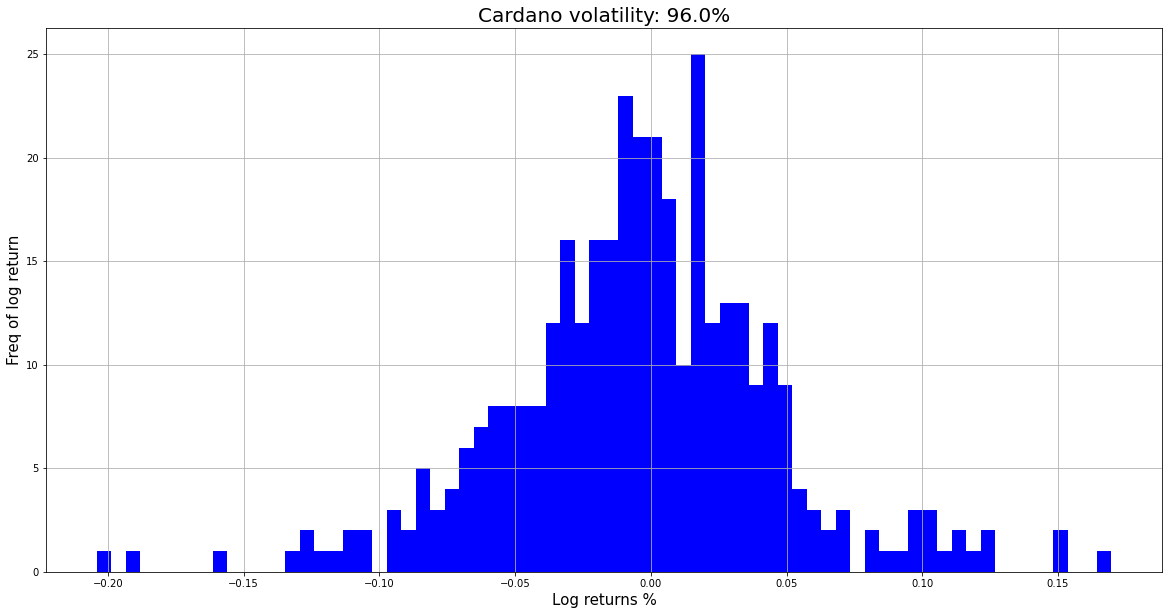

In [13]:
fig, ax = plt.subplots()
ADA_data['Log returns'].hist(ax=ax, bins=70, color='b', figsize=(20, 10))
ax.set_xlabel('Log returns %', fontsize='15')
ax.set_ylabel('Freq of log return', fontsize='15')
ax.set_title('Cardano volatility: '+ str_vol + '%', fontsize='20')

# Binomial Tree

In [14]:
S0 = ADA_data["Close"][-1]               # spot cryptocurrency price
K = 0.5                                  # strike price
T = 6/12                                 # maturity (6 months) 
r = 0.03                                 # risk free rate 
sig = volatility                         # volatility
N = 7                                    # number of periods or number of time steps  
payoff = "call"                          # payoff

In [15]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor
print("The factor by which the price will go up is:", round(u,4))
print("The factor by which the price will go down is:", round(d,4))

The factor by which the price will go up is: 1.2929
The factor by which the price will go down is: 0.7735


In [16]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [17]:
S

array([[0.30937201, 0.39998459, 0.51713686, 0.6686021 , 0.86443028,
        1.11761497, 1.44495543, 1.86817127],
       [0.        , 0.23928682, 0.30937201, 0.39998459, 0.51713686,
        0.6686021 , 0.86443028, 1.11761497],
       [0.        , 0.        , 0.18507874, 0.23928682, 0.30937201,
        0.39998459, 0.51713686, 0.6686021 ],
       [0.        , 0.        , 0.        , 0.14315097, 0.18507874,
        0.23928682, 0.30937201, 0.39998459],
       [0.        , 0.        , 0.        , 0.        , 0.11072153,
        0.14315097, 0.18507874, 0.23928682],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.08563865, 0.11072153, 0.14315097],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.06623806, 0.08563865],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.05123248]])

In [18]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
print("The probability of the price going up is:", round(p*100,2))
print("The probability of the price going down is:", round(q*100,2))

The probability of the price going up is: 44.03
The probability of the price going down is: 55.97


In [19]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.36817127],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.61761497],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.1686021 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]])

# European Option

In [20]:
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[0.03975626, 0.07309489, 0.13123437, 0.228868  , 0.38506169,
        0.61975324, 0.94602571, 1.36817127],
       [0.        , 0.0136863 , 0.02764572, 0.05494412, 0.10689182,
        0.20194205, 0.36550056, 0.61761497],
       [0.        , 0.        , 0.00275904, 0.00628027, 0.01429551,
        0.03254023, 0.07406991, 0.1686021 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]])

In [21]:
print('European ' + payoff, str(V[0,0]))

European call 0.039756255019875855


# Monte Carlo Simulation

In [22]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [23]:
S0 = ADA_data["Close"][-1]               # spot cryptocurrency price
K = 0.5                                  # strike price
T = 6/12                                 # maturity (6 months) 
r = 0.03                                 # risk free rate 
sigma = volatility                       # volatility


In [24]:
S = mcs_simulation_np(1000)

In [25]:
S = np.transpose(S)
S

array([[0.30937201, 0.30573113, 0.30758433, ..., 0.19913434, 0.20506124,
        0.20561769],
       [0.30937201, 0.3169472 , 0.32270973, ..., 0.30146456, 0.29575168,
        0.30380167],
       [0.30937201, 0.30723165, 0.30844671, ..., 0.09233695, 0.08926048,
        0.08974464],
       ...,
       [0.30937201, 0.30354043, 0.30871909, ..., 0.2041025 , 0.20216582,
        0.21006576],
       [0.30937201, 0.31373211, 0.30867868, ..., 0.25118412, 0.2424668 ,
        0.24138011],
       [0.30937201, 0.30054545, 0.29190389, ..., 0.15571377, 0.15416851,
        0.15972818]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period ADA-USD Cryptocurrency values')

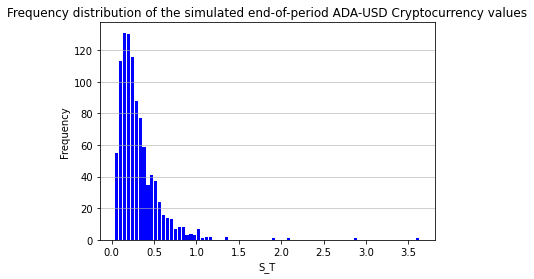

In [26]:
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='b', rwidth=0.8)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-period ADA-USD Cryptocurrency values')

In [27]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 0.037047870989413555


# Calculating Greeks

## Delta

In [28]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [29]:
round(delta(S0, 0.5, 0.5, 0.03, 0, volatility, 'call'),4)

0.3653

In [30]:
S = np.linspace(0.05, 1, 101)
T = np.linspace(0.1, 1, 101)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], K, T[i], r, 0, volatility, "call")

C:\Users\shubh\AppData\Local\Temp\ipykernel_2288\275308552.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


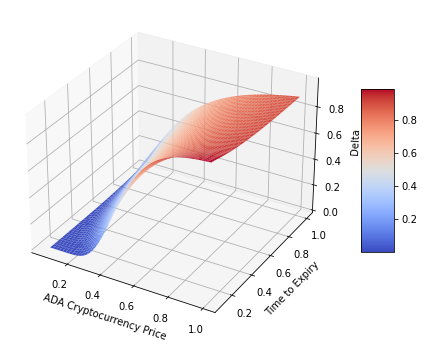

In [31]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('ADA Cryptocurrency Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);


## Gamma

In [32]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [33]:
S = np.linspace(0.05, 1, 101)
T = np.linspace(0.1, 1, 101)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], K, T[i], r, 0, volatility, 'call')

C:\Users\shubh\AppData\Local\Temp\ipykernel_2288\4058514851.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


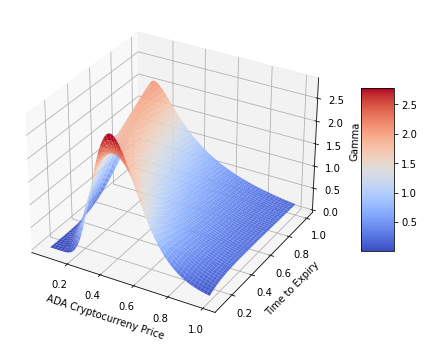

In [34]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('ADA Cryptocurreny Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [35]:
round(gamma(S0, 0.5, 0.5, 0.03, 0, volatility, 'call'),4)

1.7614

## Speed

In [36]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [37]:
S = np.linspace(0.05, 1, 101)
T = np.linspace(0.1, 1, 101)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], K, T[i], r, 0, volatility, 'call')

C:\Users\shubh\AppData\Local\Temp\ipykernel_2288\2283720229.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


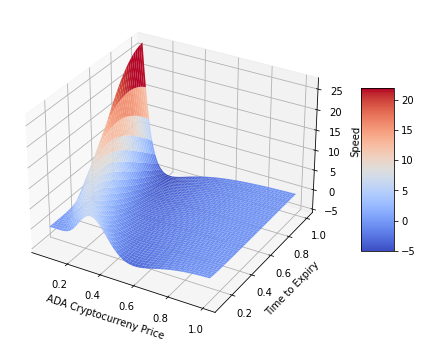

In [38]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('ADA Cryptocurreny Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Theta

In [39]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [40]:
S = np.linspace(0.05, 1, 101)
T = np.linspace(0.1, 1, 101)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], K, T[i], r, 0, volatility, 'call')

C:\Users\shubh\AppData\Local\Temp\ipykernel_2288\2357533659.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


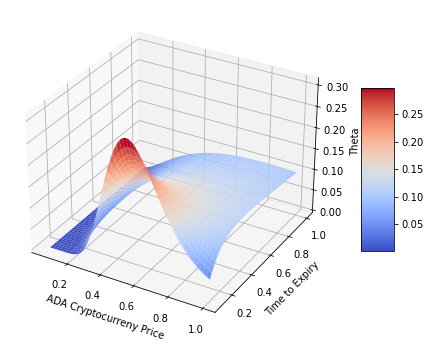

In [41]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('ADA Cryptocurreny Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Rho

In [42]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [43]:
S = np.linspace(0.05, 1, 101)
T = np.linspace(0.1, 1, 101)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], K, T[i], r, 0, volatility, 'call')

C:\Users\shubh\AppData\Local\Temp\ipykernel_2288\1148201494.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


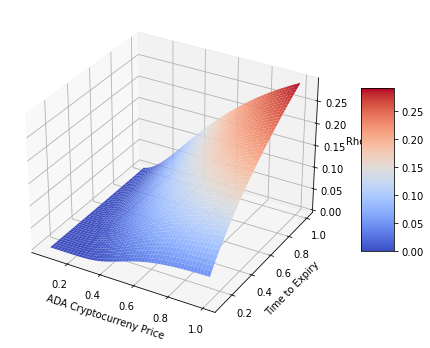

In [44]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('ADA Cryptocurreny Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Vega

In [45]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [46]:
S = np.linspace(0.05, 1, 101)
T = np.linspace(0.1, 1, 101)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], K, T[i], r, 0, volatility, 'call')

C:\Users\shubh\AppData\Local\Temp\ipykernel_2288\1992521587.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


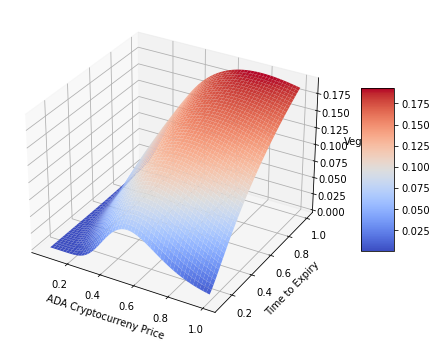

In [47]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('ADA Cryptocurreny Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [48]:
v = vega(S0, K, 0.5, r, 0, volatility, 'call')
val_opt = v*0.01
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', val_opt.round(6), '.')

The value of Vega is 0.0822 . If the volatility increases 1%, then the value of the option will increase $ 0.000822 .
